# Exploratory data analysis on fitbit activity data

In [40]:
import pandas as pd;
import matplotlib.pyplot as plt;
%matplotlib inline


In [41]:
data = pd.read_csv('../data/fitbit_export_activity_jan_mar.csv');

The data analysed is provided by the fitbit activity tracker for one particular person over the period of 3 months. Let's see if we can show any trends and dependencies in there.

In [42]:
data.head(15)

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal
0,01-01-2016,1491,0,0,0,1440,0,0,0,0
1,02-01-2016,1491,0,0,0,1440,0,0,0,0
2,03-01-2016,1491,0,0,0,1440,0,0,0,0
3,04-01-2016,1491,0,0,0,1440,0,0,0,0
4,05-01-2016,1491,0,0,0,1440,0,0,0,0
5,06-01-2016,1491,0,0,0,1440,0,0,0,0
6,07-01-2016,1491,0,0,0,1440,0,0,0,0
7,08-01-2016,1491,0,0,0,1440,0,0,0,0
8,09-01-2016,1491,0,0,0,1440,0,0,0,0
9,10-01-2016,1993,11290,"7,64",0,1180,115,10,51,660


In [43]:
data.describe()

,CalBurned,Steps,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal
count,91.000000,91.000000,91,91.000000,91.000000,91.000000,91.000000,91.000000
mean,2254.505495,10170.549451,0,809.791209,206.912088,18.351648,36.582418,998.571429
std,470.214097,6838.523493,0,342.394948,113.502486,17.776622,35.737956,606.287540
min,1463.000000,0.000000,0,295.000000,0.000000,0.000000,0.000000,0.000000
25%,2096.500000,7236.500000,0,566.000000,184.500000,6.000000,16.000000,783.500000
50%,2298.000000,10270.000000,0,691.000000,237.000000,14.000000,28.000000,1060.000000
75%,2498.500000,13682.000000,0,1001.000000,274.000000,25.000000,49.500000,1319.500000
max,3438.000000,31093.000000,0,1440.000000,420.000000,75.000000,203.000000,2459.000000


# Cleaning of the data
The data contains several records where absolutely no activity was tracked. Most certainly the person was not using their device on that day. These records contain no useful information at all, we'll discard them.

In [44]:
data.head(5)

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal
0,01-01-2016,1491,0,0,0,1440,0,0,0,0
1,02-01-2016,1491,0,0,0,1440,0,0,0,0
2,03-01-2016,1491,0,0,0,1440,0,0,0,0
3,04-01-2016,1491,0,0,0,1440,0,0,0,0
4,05-01-2016,1491,0,0,0,1440,0,0,0,0


In [45]:
data = data[data['MinNoActivity']!= 1440]


One day consists of 24 * 60 = 11440 minutes. We can see however that the minutues within one day in our data do not add up to this value. To better account for fact, we introduce a new column, for 'MinUnknown' containing the missing minutes.

In [46]:
minUnknown = 1440 - data.loc[:,('MinNoActivity','MinLowActivity', 'MinMidActivity', 'MinHighActivity')].sum(axis = 1) # sum across columns


In [47]:
data['MinUnknown'] = minUnknown


In [48]:
data.head()

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal,MinUnknown
9,10-01-2016,1993,11290,"7,64",0,1180,115,10,51,660,84
10,11-01-2016,2460,11419,"7,78",0,649,284,16,32,1232,459
11,12-01-2016,2823,17148,"11,63",0,547,355,17,65,1716,456
12,13-01-2016,2352,10652,"7,24",0,734,207,20,48,1069,431
13,14-01-2016,2264,10276,"7,03",0,1206,187,8,39,959,0


Let's just check if we did a good job in filling up missing data'

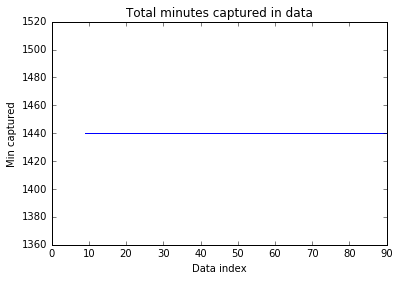

In [49]:
plt.plot(data.index.values, data['MinNoActivity']+data['MinLowActivity']+data['MinMidActivity']+data['MinHighActivity'] + data['MinUnknown'])
plt.title('Total minutes captured in data')
plt.xlabel('Data index')
plt.ylabel('Min captured')

OK, looks like every day has 1440 minutes, that's what we wanted.

# Visualizing the data
Let's see some graphical representations of the data

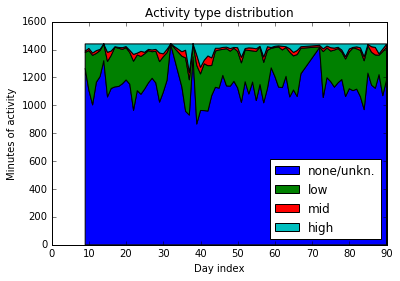

In [50]:
fig, ax = plt.subplots()
ax.stackplot(data.index.values, data['MinNoActivity'] + data['MinUnknown'],
             data['MinLowActivity'], data['MinMidActivity'],data['MinHighActivity'])
plt.title('Activity type distribution')
plt.xlabel('Day index')
plt.ylabel('Minutes of activity')
plt.legend(['none/unkn.', 'low', 'mid', 'high'],loc='lower right')
plt.show()


It looks like we have still a few records where the "no activity" is filling almost all the day. Probably, the fitbit device did not function correctly on that day. However, we leave this noisy data for now.

Let's investigate how active this person is on average.

print( "Average activity per day in hours None=", round(data['MinNoActivity'].mean()/60,1), "Low=",round(data['MinLowActivity'].mean()/60,1), "Mid=",round(data['MinMidActivity'].mean()/60,1), "High=",round(data['MinHighActivity'].mean()/60,1))

In [51]:
data['Steps'].mean()

12177.894736842105

In conclusion, the person does not spend much time in an active way. However, it reaches the doctors recomendation of 10 thousand steps per day.

# Adding new features
Since we can suspect that the data depends on the day of the week, we'll add this feature

In [52]:
#This is how to convert the date to day of week
import datetime

data['WeekDay'] = data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y').strftime('%a'))

In [53]:
data.head(3)

,Date,CalBurned,Steps,Distance,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal,MinUnknown,WeekDay
9,10-01-2016,1993,11290,"7,64",0,1180,115,10,51,660,84,Sun
10,11-01-2016,2460,11419,"7,78",0,649,284,16,32,1232,459,Mon
11,12-01-2016,2823,17148,"11,63",0,547,355,17,65,1716,456,Tue


Let's check the averages per day of the week.

In [54]:
data.groupby('WeekDay').mean()

,CalBurned,Steps,Floors,MinNoActivity,MinLowActivity,MinMidActivity,MinHighActivity,Cal,MinUnknown
WeekDay,,,,,,,,,
Fri,2363.800000,11237.700000,0,714.000000,242.900000,18.500000,40.500000,1135.500000,424.100000
Mon,2317.500000,10469.333333,0,650.000000,242.083333,19.250000,31.416667,1083.666667,497.250000
Sat,2602.800000,15609.600000,0,607.600000,275.900000,40.200000,54.800000,1460.500000,461.500000
Sun,2439.750000,13833.166667,0,705.666667,223.750000,25.666667,64.250000,1251.166667,420.666667
Thu,2415.500000,11779.500000,0,736.100000,265.000000,17.200000,36.400000,1192.000000,385.300000
Tue,2321.166667,10622.666667,0,722.250000,237.666667,15.750000,35.833333,1080.250000,428.500000
Wed,2419.900000,12015.000000,0,657.900000,254.900000,18.300000,43.400000,1200.900000,465.500000


{'boxes': [<matplotlib.lines.Line2D at 0x1f5590700f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f558f95748>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f5590c4470>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f5590c4550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1f559070470>,
  <matplotlib.lines.Line2D at 0x1f55ab135f8>]}

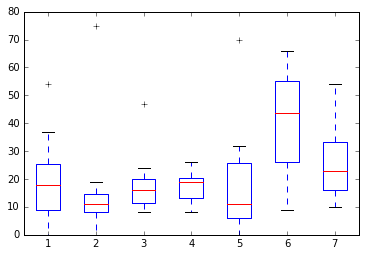

In [85]:
midActivityPerWeekDay = []
wkDays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for day in wkDays:
    min = data[data['WeekDay'] == day]['MinMidActivity']
    midActivityPerWeekDay.append(min.values)
    
plt.boxplot(midActivityPerWeekDay)
